## Praca domowa 4

#### Autor: Piotr Okonek

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [20]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

## Zadanie 1a

In [21]:
df.loc[(df.Year>2015)&(df.Publisher=="Nintendo")&(df.NA_Sales<df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


## Zadanie 1b

In [22]:
tylko2010=df.loc[df.Year==2010]

In [15]:
tylko2010.groupby(df.Genre).Global_Sales.agg("sum").head(1)

Genre
Action    117.64
Name: Global_Sales, dtype: float64

## Zadanie 1c

In [26]:
tmp=df.groupby(df.Genre).agg("mean")
tmp2=tmp.loc[tmp.JP_Sales>tmp.EU_Sales]
tmp3=tmp2[["JP_Sales"]]
tmp4=tmp3.reset_index()
tmp5=tmp4.rename(columns={"JP_Sales":"Średnia sprzedaż w Japonii","Genre":"Typ gry"})
tmp5.sort_values(["Średnia sprzedaż w Japonii"]).reset_index(drop = True)

,Typ gry,Średnia sprzedaż w Japonii
0,Strategy,0.073284
1,Puzzle,0.099439
2,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

# Oryginalny wykres + źródło

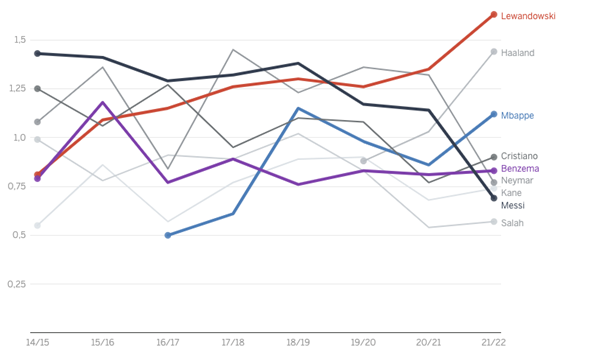
https://twitter.com/mati_swiecicki/status/1452176519779045376

# Wykres w ggplot2 +link
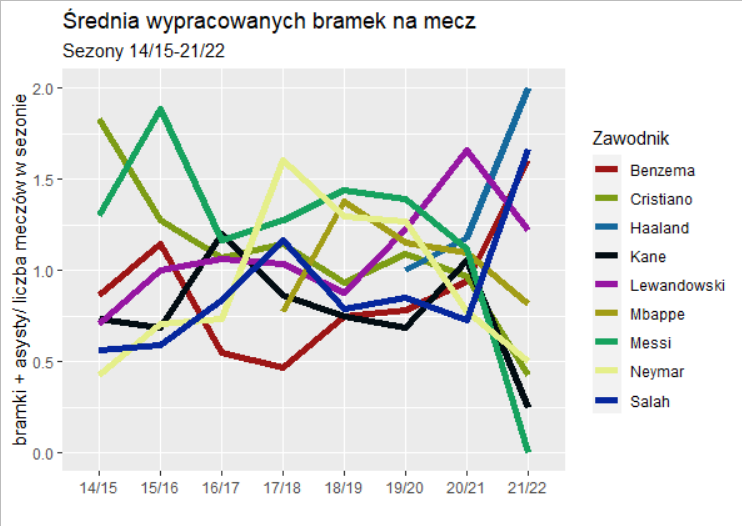
https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/OkonekPiotr/Praca_domowa_2_twd.pdf

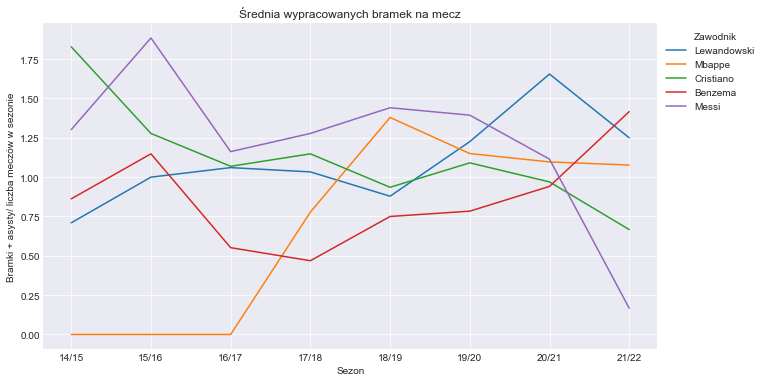

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel("Zestawienie_zawodnicy.xlsx")
plt.style.use('seaborn-darkgrid')
sns.lineplot(data=df,x="Sezon",y="Index",hue="Zawodnik")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Średnia wypracowanych bramek na mecz")
plt.ylabel("Bramki + asysty/ liczba meczów w sezonie")
plt.show()
plt.rcParams["figure.figsize"] = (11,6)

# Czemu lepszy?
* Zostały poprawione kolory
* Zaktualizowano statystyki
* Usunięto piłkarzy, którzy od stworzenia wykresu z punktu 2 stracili szansę na zdobycie Złotej Piłki
* Wyraźniejsze osie niż na pierwszym wykresie
